In [112]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
import seaborn as sns

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

In [113]:
data = pd.read_csv('full.csv')
print(data.shape)
print(data.head())
socMon = data['socMon']
btSoc = data['btSoc']
#data.drop(['socMon', 'btSoc', 'Unnamed: 5'], axis=1, inplace=True)
print(data.shape)
print(data.head())

(1005, 6)
   vbatt  ibatt tempr socMon btSoc  Unnamed: 5
0    389     25  005e     93  96f0         NaN
1    391     12  0078     98  9bf0         NaN
2    374     55  0036     00  64f0         NaN
3    376     45  003f     00  6c70         NaN
4    399     11  0067     ad  aff0         NaN
(1005, 6)
   vbatt  ibatt tempr socMon btSoc  Unnamed: 5
0    389     25  005e     93  96f0         NaN
1    391     12  0078     98  9bf0         NaN
2    374     55  0036     00  64f0         NaN
3    376     45  003f     00  6c70         NaN
4    399     11  0067     ad  aff0         NaN


### Features represented in respective units
 - vbatt in volt
 - ibatt in Amp
 - tempr in Celsius
 



In [114]:
data['vbatt'] = data['vbatt'].apply(lambda x: x * 1.0/100.0)
data['ibatt'] = data['ibatt'].apply(lambda x: x * 1.0/100.0)
data['tempr'] = data['tempr'].apply(lambda x: int(x, 16)/4.0)
print(data.head())

   vbatt  ibatt  tempr socMon btSoc  Unnamed: 5
0   3.89   0.25  23.50     93  96f0         NaN
1   3.91   0.12  30.00     98  9bf0         NaN
2   3.74   0.55  13.50     00  64f0         NaN
3   3.76   0.45  15.75     00  6c70         NaN
4   3.99   0.11  25.75     ad  aff0         NaN


### Target values in correct ranges
 - socMon and btSoc from 0.0 to 1.0

In [115]:
print(socMon.head())
print(btSoc.head())
socMon = socMon.apply(lambda x: int(x, 16)/255.0)
btSoc = btSoc.apply(lambda x: int(x, 16)/pow(2, 16))
data['socMon'] = data['socMon'].apply(lambda x: int(x, 16)/255.0)
data['btSoc'] = data['btSoc'].apply(lambda x: int(x, 16)/pow(2, 16))
print(socMon.head())
print(btSoc.head())
print(data.head(10))
print(data.describe())



0    93
1    98
2    00
3    00
4    ad
Name: socMon, dtype: object
0    96f0
1    9bf0
2    64f0
3    6c70
4    aff0
Name: btSoc, dtype: object
0    0.576471
1    0.596078
2    0.000000
3    0.000000
4    0.678431
Name: socMon, dtype: float64
0    0.589600
1    0.609131
2    0.394287
3    0.423584
4    0.687256
Name: btSoc, dtype: float64
   vbatt  ibatt  tempr    socMon     btSoc  Unnamed: 5
0   3.89   0.25  23.50  0.576471  0.589600         NaN
1   3.91   0.12  30.00  0.596078  0.609131         NaN
2   3.74   0.55  13.50  0.000000  0.394287         NaN
3   3.76   0.45  15.75  0.000000  0.423584         NaN
4   3.99   0.11  25.75  0.678431  0.687256         NaN
5   3.83   0.14  38.00  0.501961  0.501709         NaN
6   3.75   0.39  37.00  0.372549  0.394287         NaN
7   4.07   0.34  31.50  0.788235  0.794678         NaN
8   4.15   0.19  24.75  0.850980  0.853271         NaN
9   4.19   0.47  38.25  0.909804  0.911865         NaN
             vbatt        ibatt        tempr       so

### Describe the features

In [116]:
print(np.min(socMon), np.mean(socMon), np.max(socMon), np.median(socMon), np.std(socMon))

0.0 0.5380509218612815 0.933333333333 0.607843137255 0.2722766754164631


### Plot individual features vs. target

   vbatt  ibatt  tempr    socMon     btSoc  Unnamed: 5
0   3.89   0.25  23.50  0.576471  0.589600         NaN
1   3.91   0.12  30.00  0.596078  0.609131         NaN
2   3.74   0.55  13.50  0.000000  0.394287         NaN
3   3.76   0.45  15.75  0.000000  0.423584         NaN
4   3.99   0.11  25.75  0.678431  0.687256         NaN


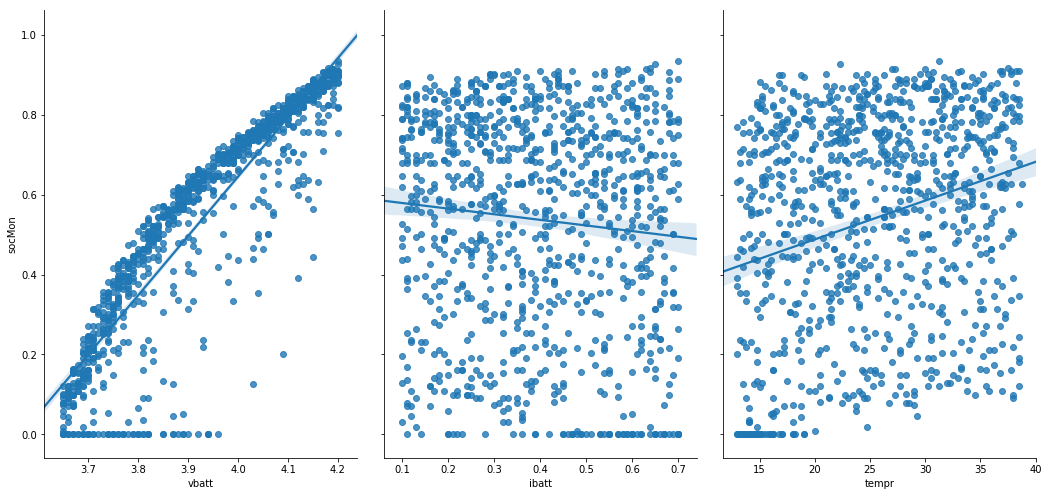

In [117]:
sns.pairplot(data, x_vars=['vbatt', 'ibatt', 'tempr'], y_vars='socMon', size = 7, aspect = 0.7, kind='reg')
#sns.pairplot(data, x_vars=['ibatt'], y_vars='socMon', size = 10, aspect = 0.8, kind='reg', hue='ibatt')
#sns.pairplot(data, x_vars=['tempr'], y_vars='socMon', size = 10, aspect = 0.8, kind='reg', hue='tempr')
#sns.pairplot(data, x_vars=['vbatt', 'ibatt', 'tempr'], y_vars='btSoc', size = 7, aspect = 0.7, kind='reg')
full_data = data.copy()
print(full_data.head())
#data.drop(['socMon', 'btSoc', 'Unnamed: 5'], axis=1, inplace=True)
data.drop(['Unnamed: 5'], axis=1, inplace=True)

### To again  show relation betw each feature and SoC, using subset of data

(1005, 6)
    vbatt  ibatt  tempr    socMon     btSoc  Unnamed: 5
3    3.76   0.45  15.75  0.000000  0.423584         NaN
6    3.75   0.39  37.00  0.372549  0.394287         NaN
7    4.07   0.34  31.50  0.788235  0.794678         NaN
9    4.19   0.47  38.25  0.909804  0.911865         NaN
11   4.12   0.34  17.75  0.815686  0.843506         NaN
14   3.82   0.41  30.25  0.501961  0.521240         NaN
18   3.71   0.41  23.50  0.227451  0.267334         NaN
21   3.70   0.37  38.50  0.192157  0.218506         NaN
22   3.81   0.44  17.25  0.203922  0.511475         NaN
26   3.65   0.49  16.25  0.000000  0.150146         NaN
(347, 6)


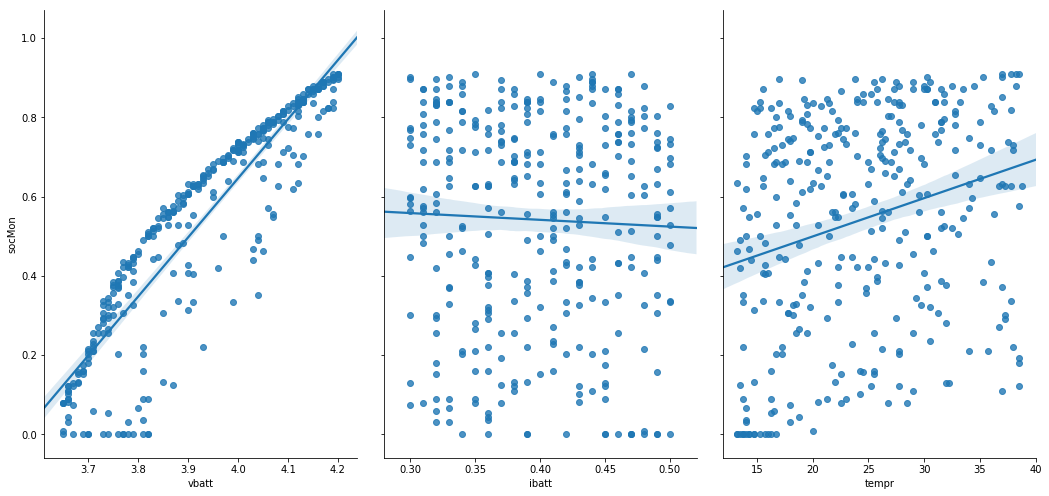

In [118]:
print(full_data.shape)
full_data.drop(full_data[full_data.ibatt > 0.5].index, inplace=True)
full_data.drop(full_data[full_data.ibatt < 0.3].index, inplace=True)
print(full_data.head(10))
print(full_data.shape)
sns.pairplot(full_data, x_vars=['vbatt', 'ibatt', 'tempr'], y_vars='socMon', size = 7, aspect = 0.7, kind='reg')

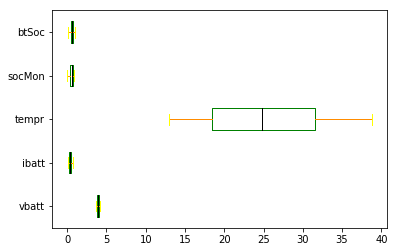

In [119]:
color = dict(boxes='Green', whiskers='DarkOrange', medians='Black', caps='Yellow')
data.plot.box(color=color, sym='r+', vert=False)

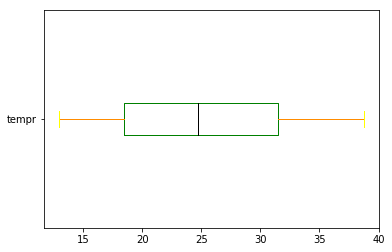

In [120]:
data['tempr'].plot.box(color=color, sym='r+', vert=False)

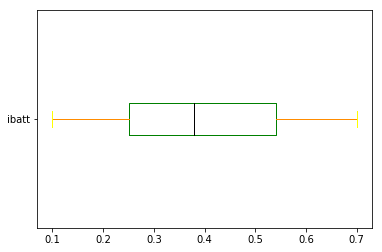

In [121]:
data['ibatt'].plot.box(color=color, sym='r+', vert=False)

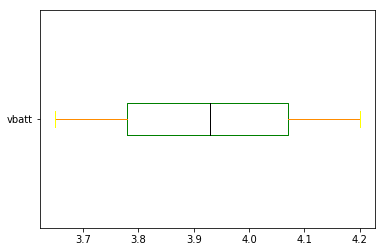

In [122]:
data['vbatt'].plot.box(color=color, sym='r+', vert=False)

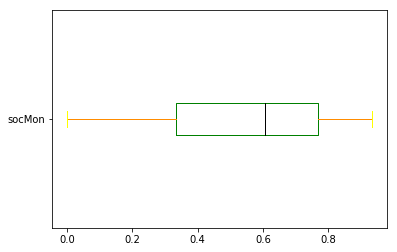

In [123]:
data['socMon'].plot.box(color=color, sym='r+', vert=False)

(1005, 5)
[ 0.2514883   0.01266488  0.96494313  0.05203125  0.05263781]
vbatt      4.170000
ibatt      0.210000
tempr     16.000000
socMon     0.862745
btSoc      0.872803
Name: 230, dtype: float64


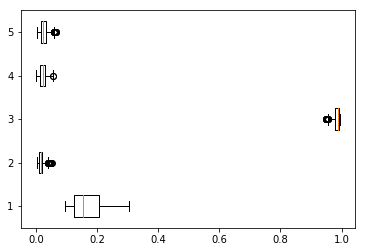

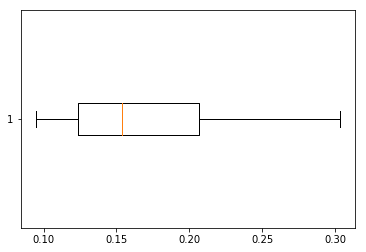

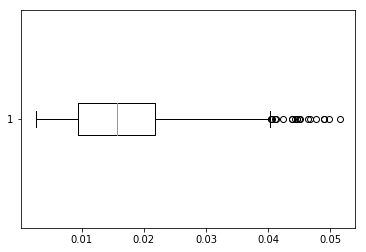

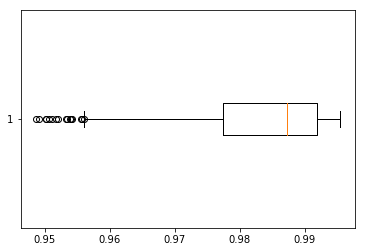

In [124]:
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data)
print(normalized_data.shape)
print(normalized_data[230])
print(data.iloc[230])
vs.dobox(normalized_data)
vs.dobox(normalized_data[:,0])
vs.dobox(normalized_data[:,1])
vs.dobox(normalized_data[:,2])


### Normalized and Scaled features
- The box plots below show that both, the features as well as target (socMon), lie in similar ranges and with mean close or equal to zero


(1005, 5)


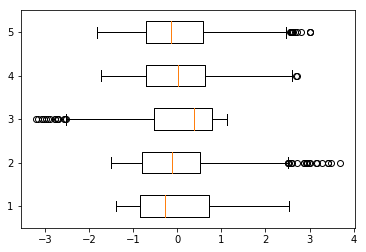

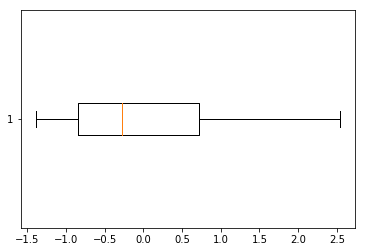

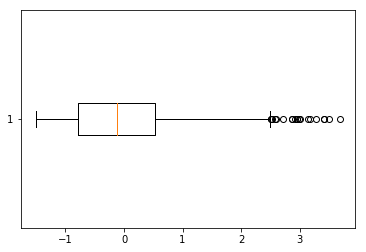

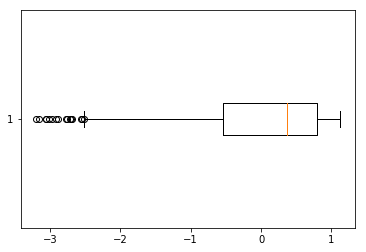

Below is boxplot for the target variable socMon:


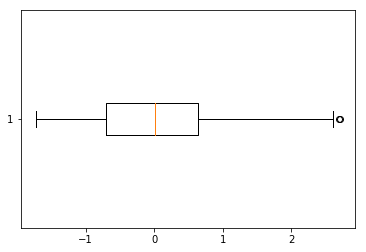

In [125]:
normAndScaled_data = preprocessing.scale(normalized_data)
print(normAndScaled_data.shape)
vs.dobox(normAndScaled_data)
vs.dobox(normAndScaled_data[:,0])
vs.dobox(normAndScaled_data[:,1])
vs.dobox(normAndScaled_data[:,2])
print("Below is boxplot for the target variable socMon:")
vs.dobox(normAndScaled_data[:,3])



In [126]:
socMon = normAndScaled_data[:,3]
btSoc = normAndScaled_data[:,4]
print(type(socMon))
print(type(normAndScaled_data))
print(normAndScaled_data.shape)
print(normAndScaled_data)
normAndScaled_data = np.delete(normAndScaled_data, [3, 4], 1)  # delete 3rd and 4th cols
print(normAndScaled_data)
print(normAndScaled_data.shape)
print(type(normAndScaled_data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1005, 5)
[[-0.09864681 -0.66905671  0.24638056  0.17569613 -0.11612949]
 [-0.73859958 -1.36071149  0.73447982 -0.17736261 -0.46778203]
 [ 1.84797571  2.37666225 -1.91130346 -1.7257088   0.14146093]
 ..., 
 [ 1.12211107  0.82121058 -0.96504771 -0.9689771   0.2880361 ]
 [ 0.08223199  0.70329648  0.00716545  1.09955847  0.78279287]
 [ 1.74524898  1.55306019 -1.90104672  1.08400903  1.98285068]]
[[-0.09864681 -0.66905671  0.24638056]
 [-0.73859958 -1.36071149  0.73447982]
 [ 1.84797571  2.37666225 -1.91130346]
 ..., 
 [ 1.12211107  0.82121058 -0.96504771]
 [ 0.08223199  0.70329648  0.00716545]
 [ 1.74524898  1.55306019 -1.90104672]]
(1005, 3)
<class 'numpy.ndarray'>


In [127]:
print(socMon)
print(socMon.shape)

[ 0.17569613 -0.17736261 -1.7257088  ..., -0.9689771   1.09955847
  1.08400903]
(1005,)


### At this point, the features are cleaned and stored in the 1005x3 numpy array - normAndScaled_data. Target is stored in the 1005x1 numpy array socMon
### Do train-test split

In [128]:
# test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normAndScaled_data, socMon, test_size=0.20, random_state=1729)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(804, 3)
(804,)
(201, 3)
(201,)


### Build a linear regr model to explore possibilities

In [129]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
print(X_train)
print(X_train[:,0].shape)
vbat_X_train = X_train[:, np.newaxis, 0]
print(vbat_X_train.shape)
vbat_X_test = X_test[:, np.newaxis, 0]
print(vbat_X_test.shape)
#print(vbat_X_train)

regr = linear_model.LinearRegression()
regr.fit(vbat_X_train, y_train)
y_pred = regr.predict(vbat_X_test)

print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
print('Variance (i.e, r2) score: %.3f' % r2_score(y_test, y_pred))



[[ 1.83523049  2.37031048 -1.96211886]
 [-0.61078912 -1.02409709  0.60774812]
 [ 0.3991805  -0.76598708 -0.2801373 ]
 ..., 
 [ 0.48041554 -0.39681484 -0.37248582]
 [-1.2641357  -0.21007894  1.05767658]
 [ 0.72213194 -0.71429185 -0.46368849]]
(804,)
(804, 1)
(201, 1)
Mean squared error: 0.961
Variance (i.e, r2) score: 0.066


### Plot results of basic 1-feature lin regr model

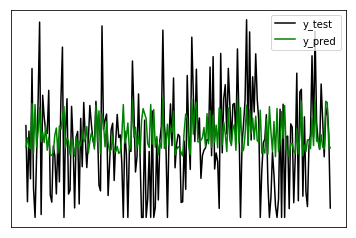

In [130]:
import matplotlib.pyplot as plt
# Plot outputs
#plt.scatter(vbat_X_test, y_test,  color='black')
#plt.plot(vbat_X_test, y_pred, color='blue', linewidth=2)
plt.plot(y_test, color="black", label='y_test')
plt.plot(y_pred, color="green", label='y_pred')
plt.xticks(())
plt.yticks(())
plt.legend()
plt.show()


### The results are quite a low value of r2

### Build a NN

In [131]:
import model_utils as utils
from keras.callbacks import ModelCheckpoint  

model1 = utils.make_model()
model1.summary()

# Compile model
model1.compile(loss='mean_squared_error', optimizer='sgd')
checkpointer = ModelCheckpoint(filepath='saved_models/best.model1.hdf5', 
                               verbose=1, save_best_only=True)

train_log_m1 = model1.fit(X_train, y_train, epochs=300,
                      validation_split=0.1, verbose=2, callbacks=[checkpointer])

model1.load_weights('saved_models/best.model1.hdf5')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 64)                256       
_________________________________________________________________
dropout_31 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_32 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_33 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 32)                2080      
__________

Epoch 00070: val_loss did not improve
0s - loss: 0.9655 - val_loss: 1.1389
Epoch 72/300
Epoch 00071: val_loss did not improve
0s - loss: 0.9638 - val_loss: 1.1394
Epoch 73/300
Epoch 00072: val_loss did not improve
0s - loss: 0.9636 - val_loss: 1.1364
Epoch 74/300
Epoch 00073: val_loss did not improve
0s - loss: 0.9634 - val_loss: 1.1396
Epoch 75/300
Epoch 00074: val_loss did not improve
0s - loss: 0.9609 - val_loss: 1.1428
Epoch 76/300
Epoch 00075: val_loss did not improve
0s - loss: 0.9596 - val_loss: 1.1421
Epoch 77/300
Epoch 00076: val_loss did not improve
0s - loss: 0.9606 - val_loss: 1.1395
Epoch 78/300
Epoch 00077: val_loss improved from 1.13588 to 1.12913, saving model to saved_models/best.model1.hdf5
0s - loss: 0.9597 - val_loss: 1.1291
Epoch 79/300
Epoch 00078: val_loss did not improve
0s - loss: 0.9595 - val_loss: 1.1295
Epoch 80/300
Epoch 00079: val_loss did not improve
0s - loss: 0.9589 - val_loss: 1.1313
Epoch 81/300
Epoch 00080: val_loss improved from 1.12913 to 1.12697, 

Epoch 00140: val_loss did not improve
0s - loss: 0.8028 - val_loss: 0.8881
Epoch 142/300
Epoch 00141: val_loss did not improve
0s - loss: 0.8185 - val_loss: 0.8982
Epoch 143/300
Epoch 00142: val_loss did not improve
0s - loss: 0.8161 - val_loss: 0.8911
Epoch 144/300
Epoch 00143: val_loss did not improve
0s - loss: 0.8267 - val_loss: 0.9142
Epoch 145/300
Epoch 00144: val_loss did not improve
0s - loss: 0.8162 - val_loss: 0.9119
Epoch 146/300
Epoch 00145: val_loss did not improve
0s - loss: 0.8088 - val_loss: 0.8980
Epoch 147/300
Epoch 00146: val_loss improved from 0.88778 to 0.88482, saving model to saved_models/best.model1.hdf5
0s - loss: 0.7973 - val_loss: 0.8848
Epoch 148/300
Epoch 00147: val_loss did not improve
0s - loss: 0.8048 - val_loss: 0.8967
Epoch 149/300
Epoch 00148: val_loss did not improve
0s - loss: 0.7770 - val_loss: 0.8903
Epoch 150/300
Epoch 00149: val_loss did not improve
0s - loss: 0.8083 - val_loss: 0.9001
Epoch 151/300
Epoch 00150: val_loss did not improve
0s - los

Epoch 00224: val_loss improved from 0.80570 to 0.80409, saving model to saved_models/best.model1.hdf5
0s - loss: 0.7409 - val_loss: 0.8041
Epoch 226/300
Epoch 00225: val_loss did not improve
0s - loss: 0.7561 - val_loss: 0.8169
Epoch 227/300
Epoch 00226: val_loss did not improve
0s - loss: 0.7338 - val_loss: 0.8354
Epoch 228/300
Epoch 00227: val_loss did not improve
0s - loss: 0.7417 - val_loss: 0.8136
Epoch 229/300
Epoch 00228: val_loss did not improve
0s - loss: 0.7290 - val_loss: 0.8322
Epoch 230/300
Epoch 00229: val_loss improved from 0.80409 to 0.79248, saving model to saved_models/best.model1.hdf5
0s - loss: 0.7249 - val_loss: 0.7925
Epoch 231/300
Epoch 00230: val_loss improved from 0.79248 to 0.78121, saving model to saved_models/best.model1.hdf5
0s - loss: 0.7159 - val_loss: 0.7812
Epoch 232/300
Epoch 00231: val_loss did not improve
0s - loss: 0.7598 - val_loss: 0.7992
Epoch 233/300
Epoch 00232: val_loss did not improve
0s - loss: 0.7236 - val_loss: 0.8392
Epoch 234/300
Epoch 0

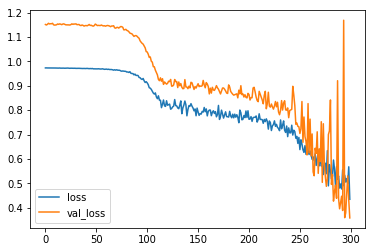

In [132]:
plt.plot(train_log_m1.history["loss"], label="loss")
plt.plot(train_log_m1.history["val_loss"], label="val_loss")
plt.legend()

In [133]:
y_pred = model1.predict(X_test)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance (i.e, r2) score: %.3f' % r2_score(y_test, y_pred))

Mean squared error: 0.340
Variance (i.e, r2) score: 0.669


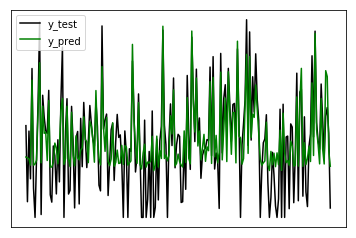

In [134]:
#plt.scatter(vbat_X_test, y_test,  color='black')
#plt.scatter(vbat_X_test, y_pred,  color='blue')
plt.plot(y_test, color="black", label="y_test")
plt.plot(y_pred, color="green", label="y_pred")
plt.xticks(())
plt.yticks(())
plt.legend()
plt.show()


### Above model has much better scores than benchmark model

### Next, refine the model, by adding LR decay and a batch size

In [135]:
from keras.optimizers import SGD
sgd = SGD(lr=0.01, decay=1e-6)
model2 = utils.make_model()
model2.summary()

# Compile model
model2.compile(loss='mean_squared_error', optimizer=sgd)
checkpointer = ModelCheckpoint(filepath='saved_models/best.model2.hdf5', 
                               verbose=1, save_best_only=True)
train_log_m2 = model2.fit(X_train, y_train, epochs=500, batch_size=8,
                       validation_split=0.1, verbose=2, callbacks=[checkpointer])
model2.load_weights('saved_models/best.model2.hdf5')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 64)                256       
_________________________________________________________________
dropout_35 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_36 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_37 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 32)                2080      
__________

Epoch 00064: val_loss did not improve
0s - loss: 0.7932 - val_loss: 0.9125
Epoch 66/500
Epoch 00065: val_loss improved from 0.82434 to 0.81186, saving model to saved_models/best.model2.hdf5
0s - loss: 0.7725 - val_loss: 0.8119
Epoch 67/500
Epoch 00066: val_loss did not improve
0s - loss: 0.7920 - val_loss: 0.8312
Epoch 68/500
Epoch 00067: val_loss did not improve
0s - loss: 0.7620 - val_loss: 0.8282
Epoch 69/500
Epoch 00068: val_loss did not improve
0s - loss: 0.7834 - val_loss: 0.8469
Epoch 70/500
Epoch 00069: val_loss did not improve
0s - loss: 0.7836 - val_loss: 0.8585
Epoch 71/500
Epoch 00070: val_loss did not improve
0s - loss: 0.7529 - val_loss: 0.8355
Epoch 72/500
Epoch 00071: val_loss did not improve
0s - loss: 0.7556 - val_loss: 0.8623
Epoch 73/500
Epoch 00072: val_loss did not improve
0s - loss: 0.7565 - val_loss: 0.8682
Epoch 74/500
Epoch 00073: val_loss did not improve
0s - loss: 0.7572 - val_loss: 0.9404
Epoch 75/500
Epoch 00074: val_loss did not improve
0s - loss: 0.7463 

Epoch 00144: val_loss did not improve
0s - loss: 0.3866 - val_loss: 1.5631
Epoch 146/500
Epoch 00145: val_loss did not improve
0s - loss: 0.4548 - val_loss: 0.3204
Epoch 147/500
Epoch 00146: val_loss did not improve
0s - loss: 0.4308 - val_loss: 0.3381
Epoch 148/500
Epoch 00147: val_loss improved from 0.26575 to 0.24398, saving model to saved_models/best.model2.hdf5
0s - loss: 0.3641 - val_loss: 0.2440
Epoch 149/500
Epoch 00148: val_loss did not improve
0s - loss: 0.3789 - val_loss: 0.6700
Epoch 150/500
Epoch 00149: val_loss did not improve
0s - loss: 0.4563 - val_loss: 0.4038
Epoch 151/500
Epoch 00150: val_loss did not improve
0s - loss: 0.4257 - val_loss: 0.2475
Epoch 152/500
Epoch 00151: val_loss did not improve
0s - loss: 0.3660 - val_loss: 0.2982
Epoch 153/500
Epoch 00152: val_loss did not improve
0s - loss: 0.3339 - val_loss: 0.2504
Epoch 154/500
Epoch 00153: val_loss did not improve
0s - loss: 0.3921 - val_loss: 0.4632
Epoch 155/500
Epoch 00154: val_loss improved from 0.24398 to

Epoch 00229: val_loss did not improve
0s - loss: 0.3049 - val_loss: 0.1809
Epoch 231/500
Epoch 00230: val_loss did not improve
0s - loss: 0.2658 - val_loss: 0.2376
Epoch 232/500
Epoch 00231: val_loss did not improve
0s - loss: 0.2727 - val_loss: 0.1706
Epoch 233/500
Epoch 00232: val_loss did not improve
0s - loss: 0.2338 - val_loss: 0.1349
Epoch 234/500
Epoch 00233: val_loss improved from 0.11896 to 0.10956, saving model to saved_models/best.model2.hdf5
0s - loss: 0.2546 - val_loss: 0.1096
Epoch 235/500
Epoch 00234: val_loss did not improve
0s - loss: 0.2863 - val_loss: 0.2021
Epoch 236/500
Epoch 00235: val_loss did not improve
0s - loss: 0.2801 - val_loss: 0.1375
Epoch 237/500
Epoch 00236: val_loss did not improve
0s - loss: 0.2795 - val_loss: 0.2446
Epoch 238/500
Epoch 00237: val_loss did not improve
0s - loss: 0.2677 - val_loss: 0.4022
Epoch 239/500
Epoch 00238: val_loss did not improve
0s - loss: 0.2620 - val_loss: 0.1418
Epoch 240/500
Epoch 00239: val_loss improved from 0.10956 to

Epoch 00318: val_loss did not improve
0s - loss: 0.2209 - val_loss: 0.0893
Epoch 320/500
Epoch 00319: val_loss did not improve
0s - loss: 0.1882 - val_loss: 0.3701
Epoch 321/500
Epoch 00320: val_loss did not improve
0s - loss: 0.2301 - val_loss: 0.1625
Epoch 322/500
Epoch 00321: val_loss did not improve
0s - loss: 0.1988 - val_loss: 0.1747
Epoch 323/500
Epoch 00322: val_loss did not improve
0s - loss: 0.2094 - val_loss: 0.0968
Epoch 324/500
Epoch 00323: val_loss did not improve
0s - loss: 0.2337 - val_loss: 0.0938
Epoch 325/500
Epoch 00324: val_loss did not improve
0s - loss: 0.2111 - val_loss: 0.0936
Epoch 326/500
Epoch 00325: val_loss did not improve
0s - loss: 0.2422 - val_loss: 0.1159
Epoch 327/500
Epoch 00326: val_loss did not improve
0s - loss: 0.2137 - val_loss: 0.1998
Epoch 328/500
Epoch 00327: val_loss did not improve
0s - loss: 0.2136 - val_loss: 0.4103
Epoch 329/500
Epoch 00328: val_loss did not improve
0s - loss: 0.2139 - val_loss: 0.0926
Epoch 330/500
Epoch 00329: val_loss

Epoch 00407: val_loss did not improve
0s - loss: 0.1605 - val_loss: 0.2238
Epoch 409/500
Epoch 00408: val_loss did not improve
0s - loss: 0.1815 - val_loss: 0.0999
Epoch 410/500
Epoch 00409: val_loss did not improve
0s - loss: 0.1906 - val_loss: 0.2840
Epoch 411/500
Epoch 00410: val_loss did not improve
0s - loss: 0.1782 - val_loss: 0.1773
Epoch 412/500
Epoch 00411: val_loss improved from 0.05912 to 0.05318, saving model to saved_models/best.model2.hdf5
0s - loss: 0.1806 - val_loss: 0.0532
Epoch 413/500
Epoch 00412: val_loss did not improve
0s - loss: 0.1778 - val_loss: 0.1037
Epoch 414/500
Epoch 00413: val_loss did not improve
0s - loss: 0.1624 - val_loss: 0.0962
Epoch 415/500
Epoch 00414: val_loss did not improve
0s - loss: 0.1749 - val_loss: 0.0716
Epoch 416/500
Epoch 00415: val_loss did not improve
0s - loss: 0.1859 - val_loss: 0.0687
Epoch 417/500
Epoch 00416: val_loss did not improve
0s - loss: 0.1798 - val_loss: 0.0743
Epoch 418/500
Epoch 00417: val_loss did not improve
0s - los

Epoch 00498: val_loss did not improve
0s - loss: 0.1555 - val_loss: 0.0684
Epoch 500/500
Epoch 00499: val_loss did not improve
0s - loss: 0.1889 - val_loss: 0.0857


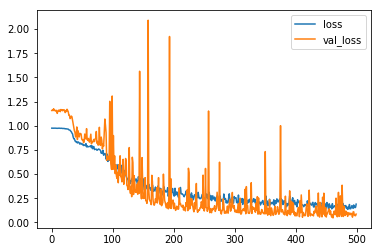

In [136]:
plt.plot(train_log_m2.history["loss"], label="loss")
plt.plot(train_log_m2.history["val_loss"], label="val_loss")
plt.legend()

In [137]:
y_pred = model2.predict(X_test)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance (i.e, r2) score: %.3f' % r2_score(y_test, y_pred))

Mean squared error: 0.065
Variance (i.e, r2) score: 0.937


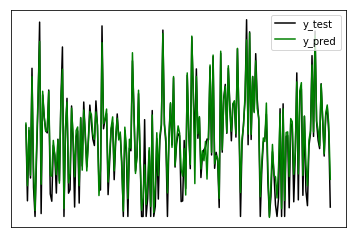

In [138]:
plt.plot(y_test, color="black", label="y_test")
plt.plot(y_pred, color="green", label="y_pred")
plt.xticks(())
plt.yticks(())
plt.legend()
plt.show()


### Try a wide model

In [139]:
sgd = SGD(lr=0.01, decay=1e-6)
model3 = utils.make_wide_model()
model3.summary()

# Compile model
model3.compile(loss='mean_squared_error', optimizer=sgd)
checkpointer = ModelCheckpoint(filepath='saved_models/best.model3.hdf5', 
                               verbose=1, save_best_only=True)
train_log_m3 = model3.fit(X_train, y_train, epochs=500, batch_size=8,
                       validation_split=0.1, verbose=2, callbacks=[checkpointer])
model3.load_weights('saved_models/best.model3.hdf5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 64)                256       
_________________________________________________________________
dropout_39 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 256)               16640     
_________________________________________________________________
dropout_40 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 257       
Total params: 17,153
Trainable params: 17,153
Non-trainable params: 0
_________________________________________________________________
Train on 723 samples, validate on 81 samples
Epoch 1/500
Epoch 00000: val_loss improved from inf to 1.13626, saving model to saved_models/

Epoch 00067: val_loss did not improve
0s - loss: 0.4883 - val_loss: 0.4501
Epoch 69/500
Epoch 00068: val_loss did not improve
0s - loss: 0.4656 - val_loss: 0.4346
Epoch 70/500
Epoch 00069: val_loss improved from 0.40878 to 0.37651, saving model to saved_models/best.model3.hdf5
0s - loss: 0.4321 - val_loss: 0.3765
Epoch 71/500
Epoch 00070: val_loss did not improve
0s - loss: 0.4236 - val_loss: 0.3932
Epoch 72/500
Epoch 00071: val_loss did not improve
0s - loss: 0.4231 - val_loss: 0.6123
Epoch 73/500
Epoch 00072: val_loss improved from 0.37651 to 0.34035, saving model to saved_models/best.model3.hdf5
0s - loss: 0.4196 - val_loss: 0.3404
Epoch 74/500
Epoch 00073: val_loss did not improve
0s - loss: 0.4514 - val_loss: 0.6130
Epoch 75/500
Epoch 00074: val_loss did not improve
0s - loss: 0.4394 - val_loss: 0.4309
Epoch 76/500
Epoch 00075: val_loss did not improve
0s - loss: 0.3879 - val_loss: 0.4617
Epoch 77/500
Epoch 00076: val_loss improved from 0.34035 to 0.28111, saving model to saved_mo

Epoch 00149: val_loss did not improve
0s - loss: 0.2663 - val_loss: 0.1029
Epoch 151/500
Epoch 00150: val_loss did not improve
0s - loss: 0.2182 - val_loss: 0.1154
Epoch 152/500
Epoch 00151: val_loss did not improve
0s - loss: 0.2262 - val_loss: 0.1131
Epoch 153/500
Epoch 00152: val_loss did not improve
0s - loss: 0.1872 - val_loss: 0.1857
Epoch 154/500
Epoch 00153: val_loss did not improve
0s - loss: 0.1979 - val_loss: 0.6321
Epoch 155/500
Epoch 00154: val_loss did not improve
0s - loss: 0.3020 - val_loss: 0.1986
Epoch 156/500
Epoch 00155: val_loss did not improve
0s - loss: 0.2689 - val_loss: 0.1170
Epoch 157/500
Epoch 00156: val_loss did not improve
0s - loss: 0.2582 - val_loss: 0.3311
Epoch 158/500
Epoch 00157: val_loss did not improve
0s - loss: 0.2233 - val_loss: 0.1924
Epoch 159/500
Epoch 00158: val_loss did not improve
0s - loss: 0.2181 - val_loss: 0.1997
Epoch 160/500
Epoch 00159: val_loss did not improve
0s - loss: 0.1970 - val_loss: 0.1590
Epoch 161/500
Epoch 00160: val_loss

Epoch 00239: val_loss did not improve
0s - loss: 0.1655 - val_loss: 0.0794
Epoch 241/500
Epoch 00240: val_loss did not improve
0s - loss: 0.1598 - val_loss: 0.0985
Epoch 242/500
Epoch 00241: val_loss did not improve
0s - loss: 0.1918 - val_loss: 0.0756
Epoch 243/500
Epoch 00242: val_loss did not improve
0s - loss: 0.1505 - val_loss: 0.0808
Epoch 244/500
Epoch 00243: val_loss improved from 0.07546 to 0.07333, saving model to saved_models/best.model3.hdf5
0s - loss: 0.2187 - val_loss: 0.0733
Epoch 245/500
Epoch 00244: val_loss improved from 0.07333 to 0.06333, saving model to saved_models/best.model3.hdf5
0s - loss: 0.1546 - val_loss: 0.0633
Epoch 246/500
Epoch 00245: val_loss did not improve
0s - loss: 0.1653 - val_loss: 0.1067
Epoch 247/500
Epoch 00246: val_loss did not improve
0s - loss: 0.1635 - val_loss: 0.0967
Epoch 248/500
Epoch 00247: val_loss did not improve
0s - loss: 0.1807 - val_loss: 0.0933
Epoch 249/500
Epoch 00248: val_loss did not improve
0s - loss: 0.1933 - val_loss: 0.0

Epoch 00329: val_loss did not improve
0s - loss: 0.1370 - val_loss: 0.0914
Epoch 331/500
Epoch 00330: val_loss did not improve
0s - loss: 0.1375 - val_loss: 0.0998
Epoch 332/500
Epoch 00331: val_loss did not improve
0s - loss: 0.1137 - val_loss: 0.0750
Epoch 333/500
Epoch 00332: val_loss did not improve
0s - loss: 0.1361 - val_loss: 0.0726
Epoch 334/500
Epoch 00333: val_loss did not improve
0s - loss: 0.1180 - val_loss: 0.1693
Epoch 335/500
Epoch 00334: val_loss did not improve
0s - loss: 0.1401 - val_loss: 0.1377
Epoch 336/500
Epoch 00335: val_loss did not improve
0s - loss: 0.1389 - val_loss: 0.0707
Epoch 337/500
Epoch 00336: val_loss did not improve
0s - loss: 0.1603 - val_loss: 0.0776
Epoch 338/500
Epoch 00337: val_loss did not improve
0s - loss: 0.1578 - val_loss: 0.0780
Epoch 339/500
Epoch 00338: val_loss improved from 0.04943 to 0.04889, saving model to saved_models/best.model3.hdf5
0s - loss: 0.1568 - val_loss: 0.0489
Epoch 340/500
Epoch 00339: val_loss did not improve
0s - los

Epoch 00419: val_loss did not improve
0s - loss: 0.1247 - val_loss: 0.0781
Epoch 421/500
Epoch 00420: val_loss did not improve
0s - loss: 0.1144 - val_loss: 0.1201
Epoch 422/500
Epoch 00421: val_loss did not improve
0s - loss: 0.1079 - val_loss: 0.0511
Epoch 423/500
Epoch 00422: val_loss did not improve
0s - loss: 0.1224 - val_loss: 0.0713
Epoch 424/500
Epoch 00423: val_loss did not improve
0s - loss: 0.1041 - val_loss: 0.0433
Epoch 425/500
Epoch 00424: val_loss did not improve
0s - loss: 0.1129 - val_loss: 0.0601
Epoch 426/500
Epoch 00425: val_loss did not improve
0s - loss: 0.1323 - val_loss: 0.0611
Epoch 427/500
Epoch 00426: val_loss did not improve
0s - loss: 0.1012 - val_loss: 0.1051
Epoch 428/500
Epoch 00427: val_loss did not improve
0s - loss: 0.1420 - val_loss: 0.0440
Epoch 429/500
Epoch 00428: val_loss did not improve
0s - loss: 0.1260 - val_loss: 0.0628
Epoch 430/500
Epoch 00429: val_loss did not improve
0s - loss: 0.1072 - val_loss: 0.1657
Epoch 431/500
Epoch 00430: val_loss

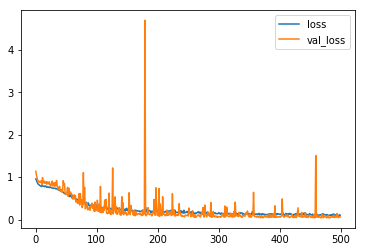

In [140]:
plt.plot(train_log_m3.history["loss"], label="loss")
plt.plot(train_log_m3.history["val_loss"], label="val_loss")
plt.legend()

In [141]:
y_pred = model3.predict(X_test)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance (i.e, r2) score: %.3f' % r2_score(y_test, y_pred))

Mean squared error: 0.035
Variance (i.e, r2) score: 0.966


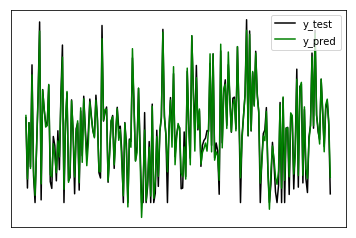

In [142]:
plt.plot(y_test, color="black", label="y_test")
plt.plot(y_pred, color="green", label="y_pred")
plt.xticks(())
plt.yticks(())
plt.legend()
plt.show()